In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [236]:
data = pd.DataFrame(pd.read_csv('USA_Housing.csv'))

In [237]:
data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cd40d68>,
      dtype=object)

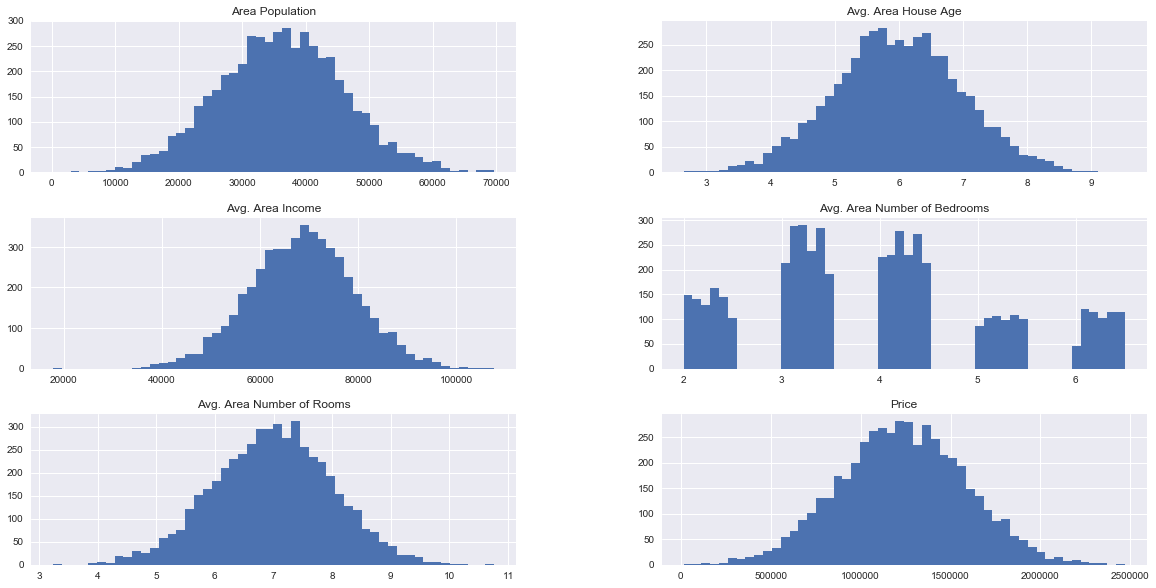

In [239]:
data.hist(bins=50, figsize=(20,10))

In [240]:
data.corr()['Price'].sort_values(ascending=False)

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64

In [186]:
data = data.drop(columns=['Address'])

In [187]:
y = data.Price
X = data.drop(columns=['Price'])

In [188]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [189]:
from sklearn.decomposition import PCA

In [190]:
pca = PCA()
pca.fit_transform(X)

array([[ 0.13432129, -1.26068758,  0.96090041,  0.59866803,  0.0383648 ],
       [-0.68943201, -0.18791729,  0.74021139, -0.75004554,  0.36248415],
       [ 1.71720017,  0.49743785, -0.47099253,  0.30491894,  0.37549983],
       ...,
       [-2.59634377, -0.75188148, -1.17114266, -0.22147121, -0.45426682],
       [ 0.91665961,  0.7061494 ,  0.25919829, -0.21170713, -0.76995861],
       [-0.12302244,  0.8550531 , -0.21573247, -0.60216693, -0.23637594]])

In [191]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

Text(0.5,0,'Number of Principal Component')

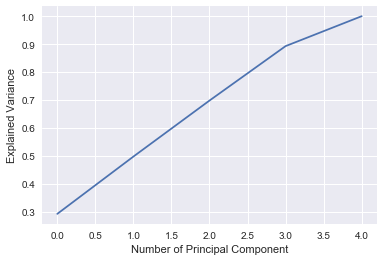

In [192]:
plt.plot(range(len(cumulative_explained_variance)),cumulative_explained_variance)
plt.ylabel('Explained Variance')
plt.xlabel('Number of Principal Component')

In [193]:
pca = PCA(n_components=4)
scaled_X_pca = pca.fit_transform(X)

In [194]:
scaled_X_pca.shape

(5000, 4)

In [195]:
scaled_X_pca = pd.DataFrame(scaled_X_pca)
scaled_X_pca.columns = ['PC{}'.format(i+1) for i in range(scaled_X_pca.shape[1])]
scaled_X_pca.head(3)

,PC1,PC2,PC3,PC4
0,0.134321,-1.260688,0.960900,0.598668
1,-0.689432,-0.187917,0.740211,-0.750046
2,1.717200,0.497438,-0.470993,0.304919


In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test  = train_test_split(scaled_X_pca, y, test_size=0.2, random_state=101)

In [222]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( max_depth=2, random_state=101,n_estimators=100)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [224]:
forest.score(X_test, y_test)

0.6533914463207057

In [225]:
prediction = forest.predict(X_test)

In [226]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [227]:
cv_scores = cross_val_score(forest, X_train, y_train, cv=10)

In [216]:
cv_scores.mean()

0.6676862452833963

In [217]:
cv_predication = cross_val_predict(forest, X_test, y_test, cv=10)

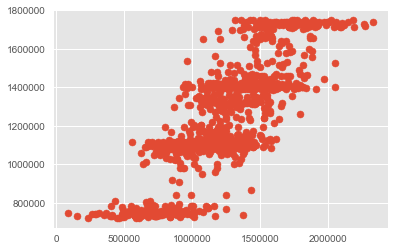

In [218]:
plt.style.use('ggplot')
plt.scatter(y_test, cv_predication)

In [242]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [243]:
xgb_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [262]:
from sklearn.metrics import mean_absolute_error
predictions = xgb_model.predict(X_test)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 99736.51150454934


In [264]:
xgb_model_2 = XGBRegressor(n_estimators=1000)
xgb_model_2.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-rmse:1.17013e+06
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.05699e+06
[2]	validation_0-rmse:955151
[3]	validation_0-rmse:863984
[4]	validation_0-rmse:781867
[5]	validation_0-rmse:708116
[6]	validation_0-rmse:642593
[7]	validation_0-rmse:583608
[8]	validation_0-rmse:530645
[9]	validation_0-rmse:483674
[10]	validation_0-rmse:441647
[11]	validation_0-rmse:404264
[12]	validation_0-rmse:370935
[13]	validation_0-rmse:341761
[14]	validation_0-rmse:315982
[15]	validation_0-rmse:293151
[16]	validation_0-rmse:272653
[17]	validation_0-rmse:255062
[18]	validation_0-rmse:238965
[19]	validation_0-rmse:225324
[20]	validation_0-rmse:213432
[21]	validation_0-rmse:202935
[22]	validation_0-rmse:194174
[23]	validation_0-rmse:186199
[24]	validation_0-rmse:179556
[25]	validation_0-rmse:173691
[26]	validation_0-rmse:168359
[27]	validation_0-rmse:164005
[28]	validation_0-rmse:160302
[29]	validation_0-rmse:156763
[30]	validation_0-rmse:153854
[31]	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [268]:
predictions = xgb_model_2.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 99061.78351783719


In [272]:
predictions = xgb_model_3.predict(X_test)

In [273]:
xgb_model_3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model_3.fit(X_train, y_train, early_stopping_rounds=5,
             eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-rmse:1.23321e+06
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.17332e+06
[2]	validation_0-rmse:1.11655e+06
[3]	validation_0-rmse:1.06257e+06
[4]	validation_0-rmse:1.01133e+06
[5]	validation_0-rmse:962684
[6]	validation_0-rmse:916558
[7]	validation_0-rmse:872916
[8]	validation_0-rmse:831383
[9]	validation_0-rmse:791909
[10]	validation_0-rmse:754545
[11]	validation_0-rmse:719260
[12]	validation_0-rmse:685723
[13]	validation_0-rmse:654047
[14]	validation_0-rmse:623822
[15]	validation_0-rmse:595124
[16]	validation_0-rmse:568206
[17]	validation_0-rmse:542498
[18]	validation_0-rmse:518297
[19]	validation_0-rmse:495189
[20]	validation_0-rmse:473488
[21]	validation_0-rmse:453151
[22]	validation_0-rmse:433501
[23]	validation_0-rmse:415301
[24]	validation_0-rmse:397927
[25]	validation_0-rmse:381766
[26]	validation_0-rmse:366427
[27]	validation_0-rmse:351841
[28]	validation_0-rmse:338080
[29]	validation_0-rmse:325207
[30]	validation_0-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [274]:
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 98627.66885919764
